### Artificial Neural Networks

Subject: Artificial Intelligence

Dates: 2020-10-01

Department of Computer Science, Hanyang University

Instructor: Yung-Kyun Noh

Contributor: Eun-Seok Ji

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Neural Network Structure

<div>
<img src="ANN.png" width="400"/>
</div>

Objective function with data $\mathcal{D} = \{\mathbf{x}_i, y_i\}_{i = 1}^N$ ($\mathbf{x}\in\mathbb{R}^D, y_i\in\{1, 0\}$):
\begin{eqnarray}
L &=& \frac{1}{2}\sum_{i = 1}^N ||g(\mathbf{x}_i) - y_i||^2
\end{eqnarray}
with intermediate functions
\begin{eqnarray}
g(\mathbf{x}_i) &=& \sigma\left( \sum_{j = 1}^{G_L} w_{L,j}g_{L,j}(\mathbf{x}_i) - b \right) \\
\vdots \\
g_{l,k}(\mathbf{x}_i) &=& \sigma\left(\sum_{j = 1}^{G_{l - 1}} w_{l - 1, k, j}g_{l - 1, j}(\mathbf{x}_i) - b_{l,k} \right)\\
\vdots \\
g_{1,k}(\mathbf{x}_i) &=& \sigma\left(\sum_{j = 1}^D w_{0,k,j}x_j - b_{1,k} \right) \\
\sigma(t) &=& \frac{1}{1 + \exp(-t)}
\end{eqnarray}

In [2]:
def draw_state(ax, W_arrays=np.array([]), bvals=np.array([]), title_str='Data'):
    # function for scattering data and drawing classification boundary
    # w0k^Tx - b > 0 or  w0k^Tx - b < 0
    
    # Scatter data points in 2-dimensional space
    ax.scatter(data1[:,0], data1[:,1], label='class 1', c='red', alpha=.3)
    ax.scatter(data2[:,0], data2[:,1], label='class 2', marker='^', c='blue', alpha=.3)
    # set a title and labels
    ax.set_title(title_str)
    ax.legend()

    if W_arrays.shape[0] != 0:
        [x1min,x1max,x2min,x2max] = ax.axis()
        x1vals = np.arange(x1min,x1max,0.1)
        for i in range(W_arrays[0].shape[0]):
            # zeros's layer, i-th nodes, 0-th or 1-th dimension
            ax.plot(x1vals, (-W_arrays[0][i,0]*x1vals + bvals[1][i])/W_arrays[0][i,1], 'k')  # b[1] indicates b_1
        ax.axis([x1min,x1max,x2min,x2max])
        ax.grid()


### Data generation

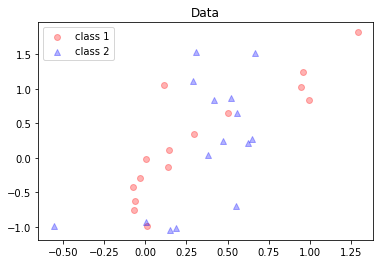

In [3]:
# generate mixture of Gaussians (class 1 & class 2)
dim = 2
datanum1_1 = 10
datanum1_2 = 5
datanum2_1 = 10
datanum2_2 = 5
datanum1 = datanum1_1 + datanum1_2
datanum2 = datanum2_1 + datanum2_2
mean1_1 = np.array([0, 0])
mean1_2 = np.array([1, 1])
mean2_1 = np.array([.5, .5])
mean2_2 = np.array([0, -1])
cov1_1 = np.array([[.01,0],[0,.2]])
cov1_2 = np.array([[.1,.02],[.02,.1]])
cov2_1 = np.array([[.02,0],[0,.2]])
cov2_2 = np.array([[.1,-.01],[-.01,.05]])
data1_1 = np.random.multivariate_normal(mean1_1, cov1_1, datanum1_1)
data1_2 = np.random.multivariate_normal(mean1_2, cov1_2, datanum1_2)
data2_1 = np.random.multivariate_normal(mean2_1, cov2_1, datanum2_1)
data2_2 = np.random.multivariate_normal(mean2_2, cov2_2, datanum2_2)
data1 = np.concatenate((data1_1, data1_2), axis=0)
data2 = np.concatenate((data2_1, data2_2), axis=0)

tstdatanum1_1 = 100
tstdatanum1_2 = 100
tstdatanum2_1 = 100
tstdatanum2_2 = 100
tstdata1_1 = np.random.multivariate_normal(mean1_1, cov1_1, tstdatanum1_1)
tstdata1_2 = np.random.multivariate_normal(mean1_2, cov1_2, tstdatanum1_2)
tstdata2_1 = np.random.multivariate_normal(mean2_1, cov2_1, tstdatanum2_1)
tstdata2_2 = np.random.multivariate_normal(mean2_2, cov2_2, tstdatanum2_2)

fig, ax = plt.subplots()
draw_state(ax)

\begin{eqnarray}
\frac{dL}{dw_{l,k,j}} &=& \sum_{i = 1}^N \delta_{l + 1, k}(\mathbf{x}_i) \ g_{l + 1, k}(\mathbf{x}_i)\Big(1 - g_{l + 1, k}(\mathbf{x}_i)\Big)\ g_{l,j}(\mathbf{x}_i) \\
\delta_l:&& N \times G_{l}, \quad [\delta_l]_{i,k} = \delta_{l,k}(\mathbf{x}_i) \\
\mathbf{G}_l:&& N \times G_l, \quad [G_l]_{i,k} = g_{l,k}(\mathbf{x}_i) \\
\frac{dL}{d\mathbf{W}_l}:&&G_{l + 1}\times G_l \\
l:&& 1,\cdots,L \quad (Index: 0,\ldots,L-1)
\end{eqnarray}

### Neural Network Structure

(2,) (5,) (3,) (1,)


/var/folders/fd/7r4z_h8s5jq0_2bm_t7_4zx40000gn/T/ipykernel_87941/3046239109.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  draw_state(ax, np.array(W_arrays), np.array(bs))


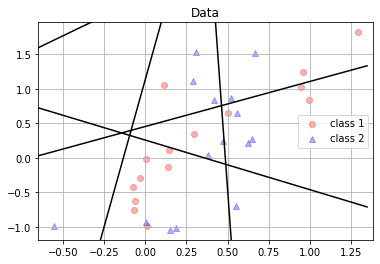

In [4]:
W_arrays = []
bs = []
deltas = []
init_var = .1

# Hidden Layers
num_nodes_per_layer = np.array([5,3])  # How many nodes in hidden layers (from the first to last layers)

bs.append(np.zeros([2]))
deltas.append(np.zeros([datanum1 + datanum2, dim]))

numLayer = len(num_nodes_per_layer)
for ilayer in range(numLayer):
    bs.append(np.random.normal(0, init_var, num_nodes_per_layer[ilayer]))
    deltas.append(np.zeros([datanum1 + datanum2, num_nodes_per_layer[ilayer]]))
    if ilayer == 0:
        W_arrays.append(np.random.normal(0, init_var, [num_nodes_per_layer[ilayer], dim]))
    else:
        W_arrays.append(np.random.normal(0, init_var, [num_nodes_per_layer[ilayer], num_nodes_per_layer[ilayer-1]]))
W_arrays.append(np.random.normal(0, init_var, [1, num_nodes_per_layer[-1]])) # last layer
bs.append(np.random.normal(0, init_var, 1))
deltas.append(np.zeros([datanum1 + datanum2, 1]))

fig, ax = plt.subplots()
draw_state(ax, np.array(W_arrays), np.array(bs))

print(bs[0].shape, bs[1].shape, bs[2].shape, bs[3].shape)

In [5]:
def logistic_function(t):
    # example: logistic_function(np.array([0,1,2]))
    
    ret_val = 1/(1 + np.exp(-t))
    return ret_val

In [6]:
def get_cross_entropy_loss(labels, fs):
    loss_val = np.sum(labels*np.log(fs) + (1 - labels)*np.log(1 - fs))
    return loss_val

In [7]:
def get_gs(xs, W_arrays, bs):
    # xs: datanum x dim
    # W_arrays[l]: l-th layer x (l-1)-the layer
    # bs[l]: l-th layer

    for ilayer in range(len(W_arrays)):
        if ilayer == 0:
            ts = np.matmul(xs, W_arrays[0].T) - bs[1] # broadcast bs
            gs = logistic_function(ts)
        else:
            ts = np.matmul(gs, W_arrays[ilayer].T) - bs[ilayer + 1] # broadcast bs
            gs = logistic_function(ts)
    return gs.T[0]  # final outputs of xs


In [8]:
def get_intermediate_gs(xs, W_arrays, bs):
    # xs: datanum x dim
    # W_arrays[l]: l-th layer x (l-1)-the layer
    # bs[l]: l-th layer
    
    intermediate_gs = []
    intermediate_gs.append(alldata)
    for ilayer in range(len(W_arrays)):
        if ilayer == 0:
            ts = np.matmul(xs, W_arrays[0].T) - bs[1] # broadcast bs
            gs = logistic_function(ts)
            intermediate_gs.append(gs)
        else:
            ts = np.matmul(gs, W_arrays[ilayer].T) - bs[ilayer + 1] # broadcast bs
            gs = logistic_function(ts)
            intermediate_gs.append(gs)
    return intermediate_gs


In [9]:
def get_mse_loss(labels, gs):
    loss = np.sum((labels - gs)**2)/len(labels)
    return loss
    

In [10]:
labels = np.concatenate((np.ones(datanum1), np.zeros(datanum2)))  # label of class 1: 1, label of class 2: 0
alldata = np.concatenate((data1,data2), axis=0)
intermediate_gs = get_intermediate_gs(alldata, W_arrays, bs)

loss = get_mse_loss(labels, get_gs(np.concatenate((data1, data2), axis=0), W_arrays, bs))
print(loss)

0.2500062933471407


\begin{eqnarray}
\frac{dL}{dw_{l,k,j}} &=& \sum_{i = 1}^N \delta_{l + 1, k}(\mathbf{x}_i) \ g_{l + 1, k}(\mathbf{x}_i)\Big(1 - g_{l + 1, k}(\mathbf{x}_i)\Big)\ g_{l,j}(\mathbf{x}_i) \\
\delta_l:&& N \times G_{l}, \quad [\delta_l]_{i,k} = \delta_{l,k}(\mathbf{x}_i) \\
\mathbf{G}_l:&& N \times G_l, \quad [G_l]_{i,k} = g_{l,k}(\mathbf{x}_i) \\
\frac{dL}{d\mathbf{W}_l}:&&G_{l + 1}\times G_l \\
l:&& 1,\cdots,L  \\
W_l:&& 0,\cdots,L 
\end{eqnarray}

### Learning

/var/folders/fd/7r4z_h8s5jq0_2bm_t7_4zx40000gn/T/ipykernel_87941/1004620231.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  draw_state(ax, np.array(W_arrays), np.array(bs))
/var/folders/fd/7r4z_h8s5jq0_2bm_t7_4zx40000gn/T/ipykernel_87941/1004620231.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  draw_state(ax, np.array(W_arrays), np.array(bs))


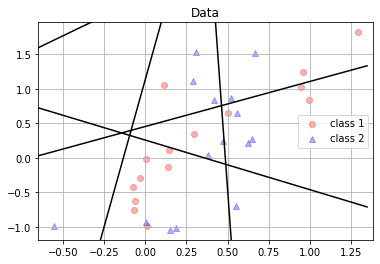

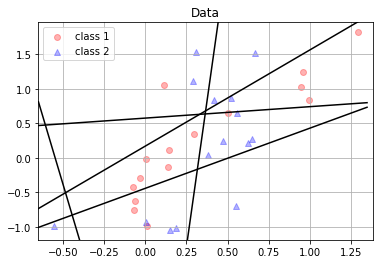

In [11]:
num_epoch = 10000

step_size = 1

fig, ax = plt.subplots()
draw_state(ax, np.array(W_arrays), np.array(bs))

for iepoch in range(num_epoch):
    intermediate_gs = get_intermediate_gs(alldata, W_arrays, bs)

    deltas[numLayer + 1] = (intermediate_gs[numLayer + 1] - np.array([labels]).T)

    for ilayer in range(numLayer, -1,-1):
        deltas[ilayer] = np.matmul(deltas[ilayer+1]*intermediate_gs[ilayer+1]*(1 - intermediate_gs[ilayer+1]), W_arrays[ilayer])

    for ilayer in range(numLayer + 1):
        W_arrays[ilayer] = W_arrays[ilayer] - \
            step_size*np.matmul((deltas[ilayer + 1]*intermediate_gs[ilayer + 1]*(1 - intermediate_gs[ilayer + 1])).T, \
            intermediate_gs[ilayer])
        bs[ilayer + 1] = bs[ilayer + 1] - \
            np.sum(deltas[ilayer + 1]*intermediate_gs[ilayer + 1]*(1 - intermediate_gs[ilayer + 1]), axis=0)*(-1)


fig, ax = plt.subplots()
draw_state(ax, np.array(W_arrays), np.array(bs))


(132, 92)
(132, 92)


/var/folders/fd/7r4z_h8s5jq0_2bm_t7_4zx40000gn/T/ipykernel_87941/1937773249.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  draw_state(ax, np.array(W_arrays), np.array(bs))


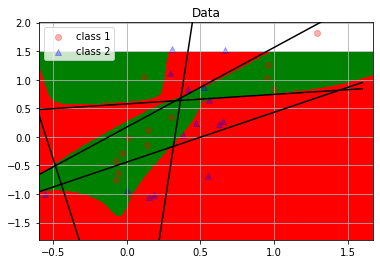

In [12]:
spacing = 0.025

meshx = np.arange(-0.6, 1.7, spacing)
meshy = np.arange(-1.8, 1.5, spacing)
meshX, meshY = np.meshgrid(meshx, meshy)
contourShape = meshX.shape
print(contourShape)

meshgridData = np.concatenate((meshX.reshape((-1,1)), meshY.reshape((-1,1))), axis=1)
# print(meshgridData)

Zs = get_gs(meshgridData, W_arrays, bs).reshape(contourShape)
print(Zs.shape)

levels = [0,.5,1]
fig, ax = plt.subplots()
CS = plt.contourf(meshX, meshY, Zs, levels, colors=('r', 'g'))

draw_state(ax, np.array(W_arrays), np.array(bs))